<a href="https://colab.research.google.com/github/GoldenWind8/AlgorithmicTrading/blob/master/NeuralNetworkModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import  tensorflow  as  tf
import pandas as pd

In [2]:
import pandas as pd
from datetime import datetime, timedelta
class DataHandler:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self):
        # read the data from the CSV file into a DataFrame
        df = pd.read_csv(self.file_path)
        return df

    def format_tickstory_data(self, df):
        # parse the date and timestamp strings into datetime objects
        df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Timestamp'])

        # create a reference datetime to determine the amount of seconds passed.
        reference = datetime(2022, 11, 29)

        # subtract the reference datetime from the DateTime column
        timedelta = df['DateTime'] - reference

        # convert the timedelta to seconds
        seconds = timedelta.dt.total_seconds()

        # add the seconds to the DataFrame
        df['Seconds'] = seconds

        #Drop NaN values
        df = df.dropna()

        return df


In [29]:
#use datahandler to read in csv file
dataHandler = DataHandler('drive/MyDrive/EURCAD.csv')
data = dataHandler.read_data()

data = dataHandler.format_tickstory_data(data)
data.head()

,Date,Timestamp,Open,High,Low,Close,Volume,DateTime,Seconds
0,20221129,00:00:00,1.39524,1.39531,1.39521,1.39531,61.859999,2022-11-29 00:00:00,0.0
1,20221129,00:00:10,1.39531,1.39533,1.39529,1.39529,31.319999,2022-11-29 00:00:10,10.0
2,20221129,00:00:20,1.39529,1.39531,1.39526,1.39531,24.240000,2022-11-29 00:00:20,20.0
3,20221129,00:00:30,1.39528,1.39532,1.39528,1.39532,12.840000,2022-11-29 00:00:30,30.0
4,20221129,00:00:40,1.39532,1.39534,1.39526,1.39531,48.139999,2022-11-29 00:00:40,40.0


In [ ]:
 # Split the data into training and testing sets
train_data = data.iloc[:int(len(data) * 0.8)]
test_data = data.iloc[int(len(data) * 0.8):]

    # Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
history = model.fit(train_data['Seconds'], train_data['Close'], epochs=50,
                        validation_data=(test_data['Seconds'], test_data['Close']))

    # Evaluate the model
test_loss, test_acc = model.evaluate(test_data['Seconds'], test_data['Close'])
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/50
2722/2722 [==============================] - 7s 2ms/step - loss: -853791.6250 - accuracy: 1.8371e-04 - val_loss: -7927299.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
2722/2722 [==============================] - 6s 2ms/step - loss: -5188225.5000 - accuracy: 1.8371e-04 - val_loss: -26998932.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
2722/2722 [==============================] - 7s 3ms/step - loss: -12484013.0000 - accuracy: 1.8371e-04 - val_loss: -54721236.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
2722/2722 [==============================] - 6s 2ms/step - loss: -22369820.0000 - accuracy: 1.8371e-04 - val_loss: -90576672.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
2722/2722 [==============================] - 5s 2ms/step - loss: -34760000.0000 - accuracy: 1.8371e-04 - val_loss: -134429088.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
2722/2722 [==============================] - 5s 2ms/step - loss: -49654500.0000 - accuracy: 1.8371e-04 - val_loss: -186341120.0000 - val_accuracy: 0.000

In [26]:
import matplotlib.pyplot as plt


def plot(data, train_predictions, predictions):
  # Plot the data
  plt.plot(data['Seconds'], data['Close'], label='Actual')

  # Plot the predictions
  plt.plot(test_data['Seconds'], predictions, label='Predictions')

  # Plot the predictions
  plt.plot(train_data['Seconds'], train_predictions, label='Predictions Training')

  # Add a legend
  plt.legend()

  # Show the plot
  plt.show()

Lets try normalizing the data for better results

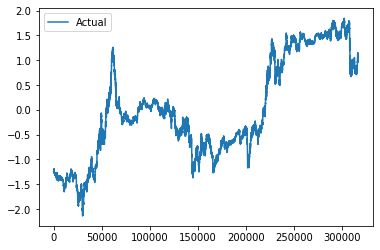

In [30]:
# Normalize the data
mean = data['Close'].mean()
std = data['Close'].std()
data['Close'] = (data['Close'] - mean) / (std)

import matplotlib.pyplot as plt

In [31]:
data['Close'] = (data['Close']/2)

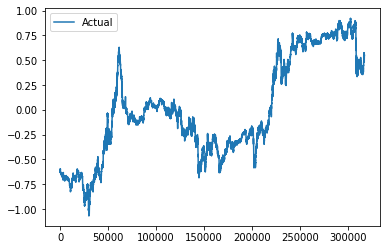

In [32]:
# Plot the data
plt.plot(data['Seconds'], data['Close'], label='Actual')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [24]:
 # Split the data into training and testing sets
train_data = data.iloc[:int(len(data) * 0.8)]
test_data = data.iloc[int(len(data) * 0.8):]

    # Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
history = model.fit(train_data['Seconds'], train_data['Close'], epochs=50,
                        validation_data=(test_data['Seconds'], test_data['Close']))

    # Evaluate the model
test_loss, test_acc = model.evaluate(test_data['Seconds'], test_data['Close'])
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

    # Make predictions
predictions = model.predict(test_data['Seconds'])

Epoch 1/50
778/778 [==============================] - 1s 1ms/step - loss: 1785.2363 - accuracy: 0.0000e+00 - val_loss: 232.6851 - val_accuracy: 0.0000e+00
Epoch 2/50
778/778 [==============================] - 1s 1ms/step - loss: 37.2507 - accuracy: 0.0000e+00 - val_loss: 107.8403 - val_accuracy: 0.0000e+00
Epoch 3/50
778/778 [==============================] - 1s 1ms/step - loss: 38.9623 - accuracy: 0.0000e+00 - val_loss: 165.2659 - val_accuracy: 0.0000e+00
Epoch 4/50
778/778 [==============================] - 1s 1ms/step - loss: 37.1857 - accuracy: 0.0000e+00 - val_loss: 10.1574 - val_accuracy: 0.0000e+00
Epoch 5/50
778/778 [==============================] - 1s 1ms/step - loss: 50.4006 - accuracy: 0.0000e+00 - val_loss: 41.3614 - val_accuracy: 0.0000e+00
Epoch 6/50
778/778 [==============================] - 1s 1ms/step - loss: 34.5846 - accuracy: 0.0000e+00 - val_loss: 43.8558 - val_accuracy: 0.0000e+00
Epoch 7/50
778/778 [==============================] - 1s 1ms/step - loss: 40.2158 -

778/778 [==============================] - 1s 701us/step


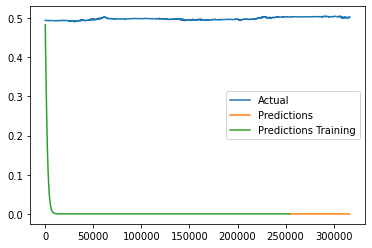

In [28]:
# Make predictions on the training data
predictions = model.predict(test_data['Seconds'])
train_predictions = model.predict(train_data['Seconds'])
plot(data, train_predictions, predictions )

Using a different activation function?

In [33]:
 # Split the data into training and testing sets
train_data = data.iloc[:int(len(data) * 0.8)]
test_data = data.iloc[int(len(data) * 0.8):]

    # Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

    # Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
history = model.fit(train_data['Seconds'], train_data['Close'], epochs=50,
                        validation_data=(test_data['Seconds'], test_data['Close']))

    # Evaluate the model
test_loss, test_acc = model.evaluate(test_data['Seconds'], test_data['Close'])
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/50
778/778 [==============================] - 1s 1ms/step - loss: 17.9524 - accuracy: 0.0000e+00 - val_loss: 4.4301 - val_accuracy: 0.0000e+00
Epoch 2/50
778/778 [==============================] - 1s 1ms/step - loss: 8.9298 - accuracy: 0.0000e+00 - val_loss: 10.9438 - val_accuracy: 0.0000e+00
Epoch 3/50
778/778 [==============================] - 1s 1ms/step - loss: -2.7362 - accuracy: 0.0000e+00 - val_loss: 10.9438 - val_accuracy: 0.0000e+00
Epoch 4/50
778/778 [==============================] - 1s 1ms/step - loss: -2.7362 - accuracy: 0.0000e+00 - val_loss: 10.9438 - val_accuracy: 0.0000e+00
Epoch 5/50
778/778 [==============================] - 1s 1ms/step - loss: -2.7362 - accuracy: 0.0000e+00 - val_loss: 10.9438 - val_accuracy: 0.0000e+00
Epoch 6/50
778/778 [==============================] - 1s 1ms/step - loss: -2.7362 - accuracy: 0.0000e+00 - val_loss: 10.9438 - val_accuracy: 0.0000e+00
Epoch 7/50
778/778 [==============================] - 1s 2ms/step - loss: -2.7362 - accura

# It's difficult to say exactly why the losses are converging to -2.7362.

# **Potential issues to resolve:**
The data might not be sufficient to learn a meaningful relationship between the input and output. If the model doesn't have enough data to learn from, it may converge to a suboptimal solution.

The model architecture might not be suitable for the problem. If the model is too simple or too complex for the data, it may have difficulty learning a meaningful relationship between the input and output.

The model might be overfitting to the training data.

In [34]:
 # Split the data into training and testing sets
train_data = data.iloc[:int(len(data) * 0.8)]
test_data = data.iloc[int(len(data) * 0.8):]

    # Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

    # Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

    # Train the model
history = model.fit(train_data['Seconds'], train_data['Close'], epochs=50,
                        validation_data=(test_data['Seconds'], test_data['Close']))

    # Evaluate the model
test_loss, test_acc = model.evaluate(test_data['Seconds'], test_data['Close'])
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/50
778/778 [==============================] - 1s 1ms/step - loss: 1.1818 - mean_absolute_error: 0.9996 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 2/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8228 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 3/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8228 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 4/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8228 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 5/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8228 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 6/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8228 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 7/50
778/7

778/778 [==============================] - 1s 703us/step


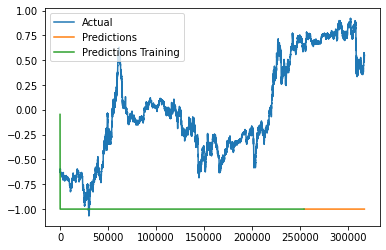

In [35]:
# Make predictions on the training data
predictions = model.predict(test_data['Seconds'])
train_predictions = model.predict(train_data['Seconds'])
plot(data, train_predictions, predictions )

In [36]:
 # Split the data into training and testing sets
train_data = data.iloc[:int(len(data) * 0.8)]
test_data = data.iloc[int(len(data) * 0.8):]

    # Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

    # Compile the model
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])

    # Train the model
history = model.fit(train_data['Seconds'], train_data['Close'], epochs=50,
                        validation_data=(test_data['Seconds'], test_data['Close']))

    # Evaluate the model
test_loss, test_acc = model.evaluate(test_data['Seconds'], test_data['Close'])
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8229 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 2/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8281 - mean_absolute_error: 0.8229 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 3/50
778/778 [==============================] - 1s 1ms/step - loss: 0.8476 - mean_absolute_error: 0.8326 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 4/50
778/778 [==============================] - 1s 1ms/step - loss: 0.9618 - mean_absolute_error: 0.8896 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 5/50
778/778 [==============================] - 1s 1ms/step - loss: 0.9665 - mean_absolute_error: 0.8920 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 6/50
778/778 [==============================] - 1s 1ms/step - loss: 0.9402 - mean_absolute_error: 0.8788 - val_loss: 2.9374 - val_mean_absolute_error: 1.7095
Epoch 7/50
778/7

778/778 [==============================] - 1s 692us/step


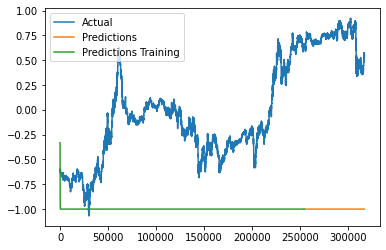

In [37]:
# Make predictions on the training data
predictions = model.predict(test_data['Seconds'])
train_predictions = model.predict(train_data['Seconds'])
plot(data, train_predictions, predictions )